# Figure 3 from Villas Boas et al., 2021 - Geophysical Research Letters

#### Data used:
- MASS sea surface height anomaly
- MASS wave directional spectra
- AltiKa SSH spectrum from [Chereskin et al. 2019]( https://doi.org/10.1029/2018JC014583)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')

import glob
import numpy as np
import xarray as xr
from tools import *

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

### Loading data from the April 9, 2019 flights

Loading binned point cloud for upwind and crosswind for the April 9 flights

In [2]:
binned_up04 = '../data/MASS/20190409/binned_point_cloud/upwind/*.nc'
dsu04 = xr.open_mfdataset(binned_up04, concat_dim='time', chunks={'time':8})

binned_cross04 = '../data/MASS/20190409/binned_point_cloud/crosswind/*.nc'
dsc04 = xr.open_mfdataset(binned_cross04, concat_dim='time', chunks={'time':6})

Computing the spectra and spectral uncertainities. The cells below used functions from ../src/tools.py

In [3]:
dim = 'atrack_bin'

dau04 = dsu04.ssh_corr
specu04 = spec_xr(dau04, dim)
specu_dani04,  box_widthu04 = daniell(specu04, dim='freq_atrack_bin',
                                  npoints=20, start_freq=1e-4)

dac04 = dsc04.ssh_corr
specc04 = spec_xr(dac04, dim)
specc_dani04,  box_widthc04 = daniell(specc04, dim='freq_atrack_bin',
                                  npoints=20, start_freq=1e-4)

nu_u04 =  2* specu_dani04.time.size * box_widthu04
error_lowu04, error_highu04 = spec_error(nu_u04)
nu_c04 =  2* specc_dani04.time.size * box_widthc04
error_lowc04, error_highc04 = spec_error(nu_c04)

# Time average and scale to m^2/cycles/km
psdu04 = specu_dani04.mean(dim='time')/1e3
psdc04 = specc_dani04.mean(dim='time')/1e3

Reading MASS omnidirectional wave spectrum

In [4]:
fnames = sorted(glob.glob('../data/MASS/20190409/dirspec/*.nc'))
ds04 = xr.open_mfdataset(fnames)
# scale from rad/m to cycles/km
cpk = 1e3/2/np.pi
# Omnidirectional spectrum
Ek04 = ds04.Ek.mean(dim='time').compute()
# Wavenumber bin width
dk04 = np.diff(Ek04.K)[0]
# Converts wavenumber to cycles/km
dk_km04 = dk04*cpk
# Degrees of freedom
nu04 = 2*len(ds04.time)
# Spectral uncertainity
error_lowo04, error_higho04 = spec_error(nu04)

### Loading data from the March 28, 2019 flights

Loading binned point cloud for upwind and crosswind for the March 28 flights

In [5]:
binned_up03 = '../data/MASS/20190328/binned_point_cloud/upwind/*.nc'
dsu03 = xr.open_mfdataset(binned_up03, concat_dim='time', chunks={'time':9})

binned_cross03 = '../data/MASS/20190328/binned_point_cloud/crosswind/*.nc'
dsc03 = xr.open_mfdataset(binned_cross03, concat_dim='time', chunks={'time':4})

Computing the spectra and spectral uncertainities. The cells below used functions from ../src/tools.py

In [6]:
dau03 = dsu03.ssh_corr
specu03 = spec_xr(dau03, dim)
specu_dani03,  box_widthu03 = daniell(specu03, dim='freq_atrack_bin',
                                  npoints=20, start_freq=1e-4)

dac03 = dsc03.ssh_corr
specc03 = spec_xr(dac03, dim)
specc_dani03,  box_widthc03 = daniell(specc03, dim='freq_atrack_bin',
                                  npoints=20, start_freq=1e-4)

nu_u03 =  2* specu_dani03.time.size * box_widthu03
error_lowu03, error_highu03 = spec_error(nu_u03)
nu_c03 =  2* specc_dani03.time.size * box_widthc03
error_lowc03, error_highc03 = spec_error(nu_c03)

# Time average and scale to m^2/cycles/km
psdu03 = specu_dani03.mean(dim='time')/1e3
psdc03 = specc_dani03.mean(dim='time')/1e3

Reading MASS omnidirectional wave spectrum

In [7]:
fnames = sorted(glob.glob('../data/MASS/20190328/dirspec/*.nc'))
ds03 = xr.open_mfdataset(fnames)
# scale from rad/m to cycles/km
cpk = 1e3/2/np.pi
# Omnidirectional spectrum
Ek03 = ds03.Ek.mean(dim='time').compute()
# Wavenumber bin width
dk03 = np.diff(Ek03.K)[0]
# Converts wavenumber to cycles/km
dk_km03 = dk03*cpk
# Degrees of freedom
nu03 = 2*len(ds03.time)
# Spectral uncertainity
error_lowo03, error_higho03 = spec_error(nu03)

### Reads AltiKa spectrum from Cehreskin et al, 2019

In [8]:
ds_atk = xr.load_dataset('../data/chereskin/altika_spectrum.nc')
k_altk = ds_atk.k.values
psd_altk = ds_atk.psd_altika.values
error_lowa, error_higha = ds_atk.error_low.values,  ds_atk.error_high.values

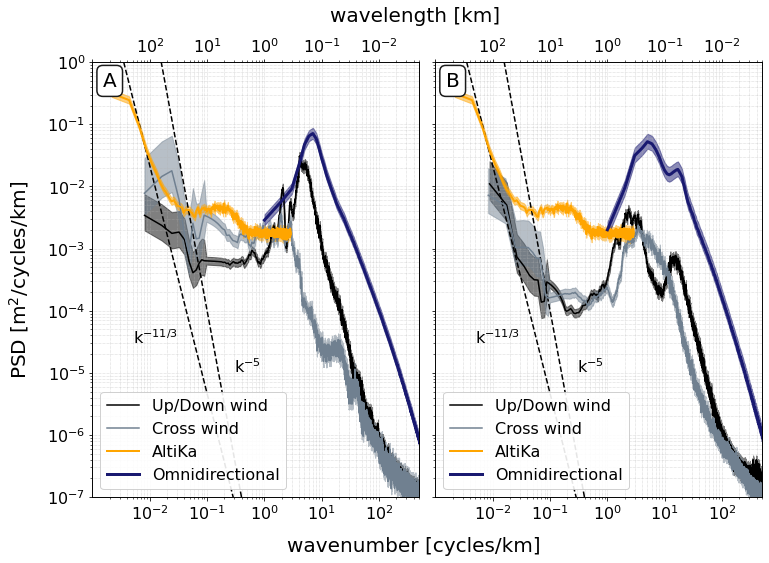

In [9]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
#=========================================
#            March Spectra 
#=========================================
# Spectral slope lines
k = np.linspace(3e-3, 1, 20)
ax1.loglog(k, 1e-9*k**-5, color='k', ls='--')
ax1.loglog(k, 1e-9*k**-(11/3), color='k', ls='--')
# Up/Down and cross wind spectra for March
ax1.loglog(specu_dani03.freq_atrack_bin*1e3, psdu03, color='k', label='Up/Down wind')
ax1.loglog(specc_dani03.freq_atrack_bin*1e3, psdc03, color='slategrey', label='Cross wind')
ax1.fill_between(specu_dani03.freq_atrack_bin*1e3, error_lowu03*psdu03, error_highu03*psdu03,
                 color='k', alpha=0.5)
ax1.fill_between(specc_dani03.freq_atrack_bin*1e3, error_lowc03*psdc03, error_highc03*psdc03,
             color='slategrey', alpha=0.5)
# AltiKa spectrum
ax1.loglog(k_altk, psd_altk, color='orange', lw=2, label='AltiKa')
ax1.fill_between(k_altk, error_lowa, error_higha, color='orange', alpha=0.5)
# MASS omnidirectional spectrum for March
ax1.loglog(Ek03[1:].K*cpk, Ek03[1:]/cpk, color='midnightblue', lw=3, label='Omnidirectional')
ax1.fill_between(Ek03[1:].K*cpk, error_lowo03*Ek03[1:]/cpk, error_higho03*Ek03[1:]/cpk,
             color='midnightblue', alpha=0.5)

ax1.grid(which='both', ls='dotted', lw=0.5)
ax1.legend(loc=3, framealpha=0.9)
ax1.set_ylabel('PSD [m$^2$/cycles/km]', fontsize=20, labelpad=14)
ax1.set_ylim([1e-7, 1])
ax1.set_xlim([1e-3, 5e2])
ax1.set_xticks([1e-2, 1e-1, 1, 10, 1e2])
add_second_axis_ssh(ax1)
ax1.annotate('k$^{-5}$', xy=(3e-1, 1e-5), fontsize=16)
ax1.annotate('k$^{-11/3}$', xy=(5e-3, 3e-5), fontsize=16)
#=========================================
#            April Spectra 
#=========================================
# Spectral slope lines
ax2.loglog(k, 1e-9*k**-5, color='k', ls='--')
ax2.loglog(k, 1e-9*k**-(11/3), color='k', ls='--')
# Up/Down and cross wind spectra for April
ax2.loglog(specu_dani04.freq_atrack_bin*1e3, psdu04, color='k', label='Up/Down wind')
ax2.loglog(specc_dani04.freq_atrack_bin*1e3, psdc04, color='slategrey', label='Cross wind')
ax2.fill_between(specu_dani04.freq_atrack_bin*1e3, error_lowu04*psdu04, error_highu04*psdu04,
                 color='k', alpha=0.5)
ax2.fill_between(specc_dani04.freq_atrack_bin*1e3, error_lowc04*psdc04, error_highc04*psdc04,
             color='slategrey', alpha=0.5)
# AltiKa spectrum
ax2.loglog(k_altk, psd_altk, color='orange', lw=2, label='AltiKa')
ax2.fill_between(k_altk, error_lowa, error_higha, color='orange', alpha=0.5)
# MASS omnidirectional spectrum for March
ax2.loglog(Ek04[1:].K*cpk, Ek04[1:]/cpk, color='midnightblue', lw=3, label='Omnidirectional')
ax2.fill_between(Ek04[1:].K*cpk, error_lowo04*Ek04[1:]/cpk, error_higho04*Ek04[1:]/cpk,
             color='midnightblue', alpha=0.5)

ax2.grid(which='both', ls='dotted', lw=0.5)
ax2.legend(loc=3, framealpha=0.9)
ax2.set_ylim([1e-7, 1])
ax2.set_xlim([1e-3, 5e2])
ax2.set_xticks([1e-2, 1e-1, 1, 10, 1e2])
add_second_axis_ssh(ax2)
ax2.annotate('k$^{-5}$', xy=(3e-1, 1e-5), fontsize=16)
ax2.annotate('k$^{-11/3}$', xy=(5e-3, 3e-5), fontsize=16)

bbox_props = dict(boxstyle="round", fc="w", lw=1.5, ec="0.1", alpha=1)
ax1.text(2e-3, 0.5, "A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax2.text(2e-3, 0.5, "B", ha="center", va="center", size=20,
        bbox=bbox_props)

fig.text(0.35, 0.03, 'wavenumber [cycles/km]', fontsize=20)
fig.text(0.4, 0.95, 'wavelength [km]', fontsize=20)
plt.subplots_adjust(wspace=0.05, hspace=None)
plt.savefig('../figs/fig03.png', dpi=150, bbox_inches='tight', facecolor="w" )